### Imports

In [1]:
from keras import models
from keras import layers
from keras.datasets import imdb

Using TensorFlow backend.
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Setting training and testing data from imported imdb dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Unrelated function to decode a particular review
1. get the word index from dataset in a dictionary format
2. swap value and key index to create a reverse cipher
3. get the word codes from the review that you want to decode and return (code-3)(0, 1, 2 reserved for padding, start of sequence, unknown) value from reverse cipher

In [24]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, "?") for i in test_data[2]])
print(decoded_review)

? many animation buffs consider ? ? the great forgotten genius of one special branch of the art puppet animation which he invented almost single ? and as it happened almost accidentally as a young man ? was more interested in ? than the cinema but his ? attempt to film two ? ? fighting led to an unexpected breakthrough in film making when he realized he could ? movement by ? beetle ? and ? them one frame at a time this discovery led to the production of amazingly elaborate classic short the ? revenge which he made in russia in ? at a time when motion picture animation of all sorts was in its ? br br the political ? of the russian revolution caused ? to move to paris where one of his first productions ? was a dark political satire ? known as ? or the ? who wanted a king a strain of black comedy can be found in almost all of films but here it is very dark indeed aimed more at grown ups who can appreciate the satirical aspects than children who would most likely find the climax ? i'm midd

In [14]:
import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
print(x_train[0][:100])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0.]


In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [7]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
x_trn1 = x_train[10000:]
x_tst1 = x_train[:10000]

y_trn1 = y_train[10000:]
y_tst1 = y_train[:10000]

In [9]:
history = model.fit(x_trn1, y_trn1, epochs = 3, batch_size = 512, validation_data = (x_tst1, y_tst1))


Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 4s 245us/step - loss: 0.5234 - acc: 0.7894 - val_loss: 0.4141 - val_acc: 0.8444
Epoch 2/3
15000/15000 [==============================] - 2s 163us/step - loss: 0.3137 - acc: 0.8995 - val_loss: 0.3234 - val_acc: 0.8716
Epoch 3/3
15000/15000 [==============================] - 2s 159us/step - loss: 0.2305 - acc: 0.9246 - val_loss: 0.2898 - val_acc: 0.8857


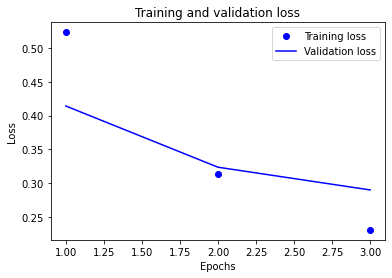

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

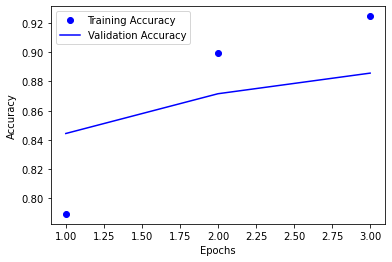

In [11]:
plt.clf()
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 130us/step


[0.3099257028388977, 0.8756399750709534]

In [13]:
model.predict(x_test)

array([[0.27633747],
       [0.9941215 ],
       [0.8566586 ],
       ...,
       [0.10260069],
       [0.17697713],
       [0.3348425 ]], dtype=float32)